In [1]:
from __future__ import division, print_function
from graph_tool.all import *
import numpy as np
import pandas as pd
from collections import defaultdict

In [11]:
titles = pd.read_pickle('udacity_courses.df')
titles.index = titles['id']
titles.head(2)

,id,title,homepage,subtitle,level,starter,image,banner_image,teaser_video,summary,...,featured,syllabus,faq,full_course_available,expected_duration,expected_duration_unit,new_release,transcripts_url,transcripts_zip_fn,transcript
id,,,,,,,,,,,,,,,,,,,,,
bio110,bio110,Tales from the Genome,https://www.udacity.com/course/tales-from-the-...,Introduction to Genetics for Beginners,beginner,False,https://lh5.ggpht.com/Fh07_XbT61CGDWsQoOMQaIeH...,https://lh4.ggpht.com/_AHqr0EXcLBzF0rrwtBagE0t...,https://www.youtube.com/watch?v=sEXrjh-tme8,This course is a journey into the biology of t...,...,False,## Lesson 1: Introduction to traits and heredi...,NaN,False,3,months,False,https://www.udacity.com/course/progress#!/c-bi...,transcripts_zips/bio110.zip,In the same way that our genomes influence tr...
cs046,cs046,Intro to Java Programming,https://www.udacity.com/course/intro-to-java-p...,Building Programs with Classes & Objects,beginner,False,https://lh4.ggpht.com/9ytiUdz0QYHwuMJFTXcNXZn4...,https://lh3.ggpht.com/AdAALPYhCsWuIvDl0ZY6zIW2...,https://www.youtube.com/watch?v=Wsp5Rrenoq4,"In this introductory course, you'll learn and ...",...,False,"### Lesson 1: Introduction to Computers, Progr...",NaN,True,4,months,False,https://www.udacity.com/course/progress#!/c-cs046,transcripts_zips/cs046.zip,"Hi, I'm Cay. I'm Sara. We'll be the instructo..."


In [2]:
df = pd.read_csv('udacity_prereq_graph.csv')
df.head(2)

,u_id,u_pre_req_id
0,cs222,cs101
1,cs222,ph100


In [17]:
g = Graph(directed=True)

id_to_v = defaultdict(lambda: g.add_vertex())

for s, t in df[['u_id', 'u_pre_req_id']].values:
    s = id_to_v[s]
    t = id_to_v[t]
    g.add_edge(t, s)
print(g)

<Graph object, directed, with 73 vertices and 118 edges at 0x7ff969e31a50>


In [18]:
v_to_id = {val:key for key, val in id_to_v.items()}

In [37]:
pos = arf_layout(g)
v_labels = g.new_vertex_property('string')
for v in g.vertices():
    try:
        l = titles.loc[v_to_id[v]]['title']
    except KeyError:
        l = v_to_id[v]        
    v_labels[v] = l

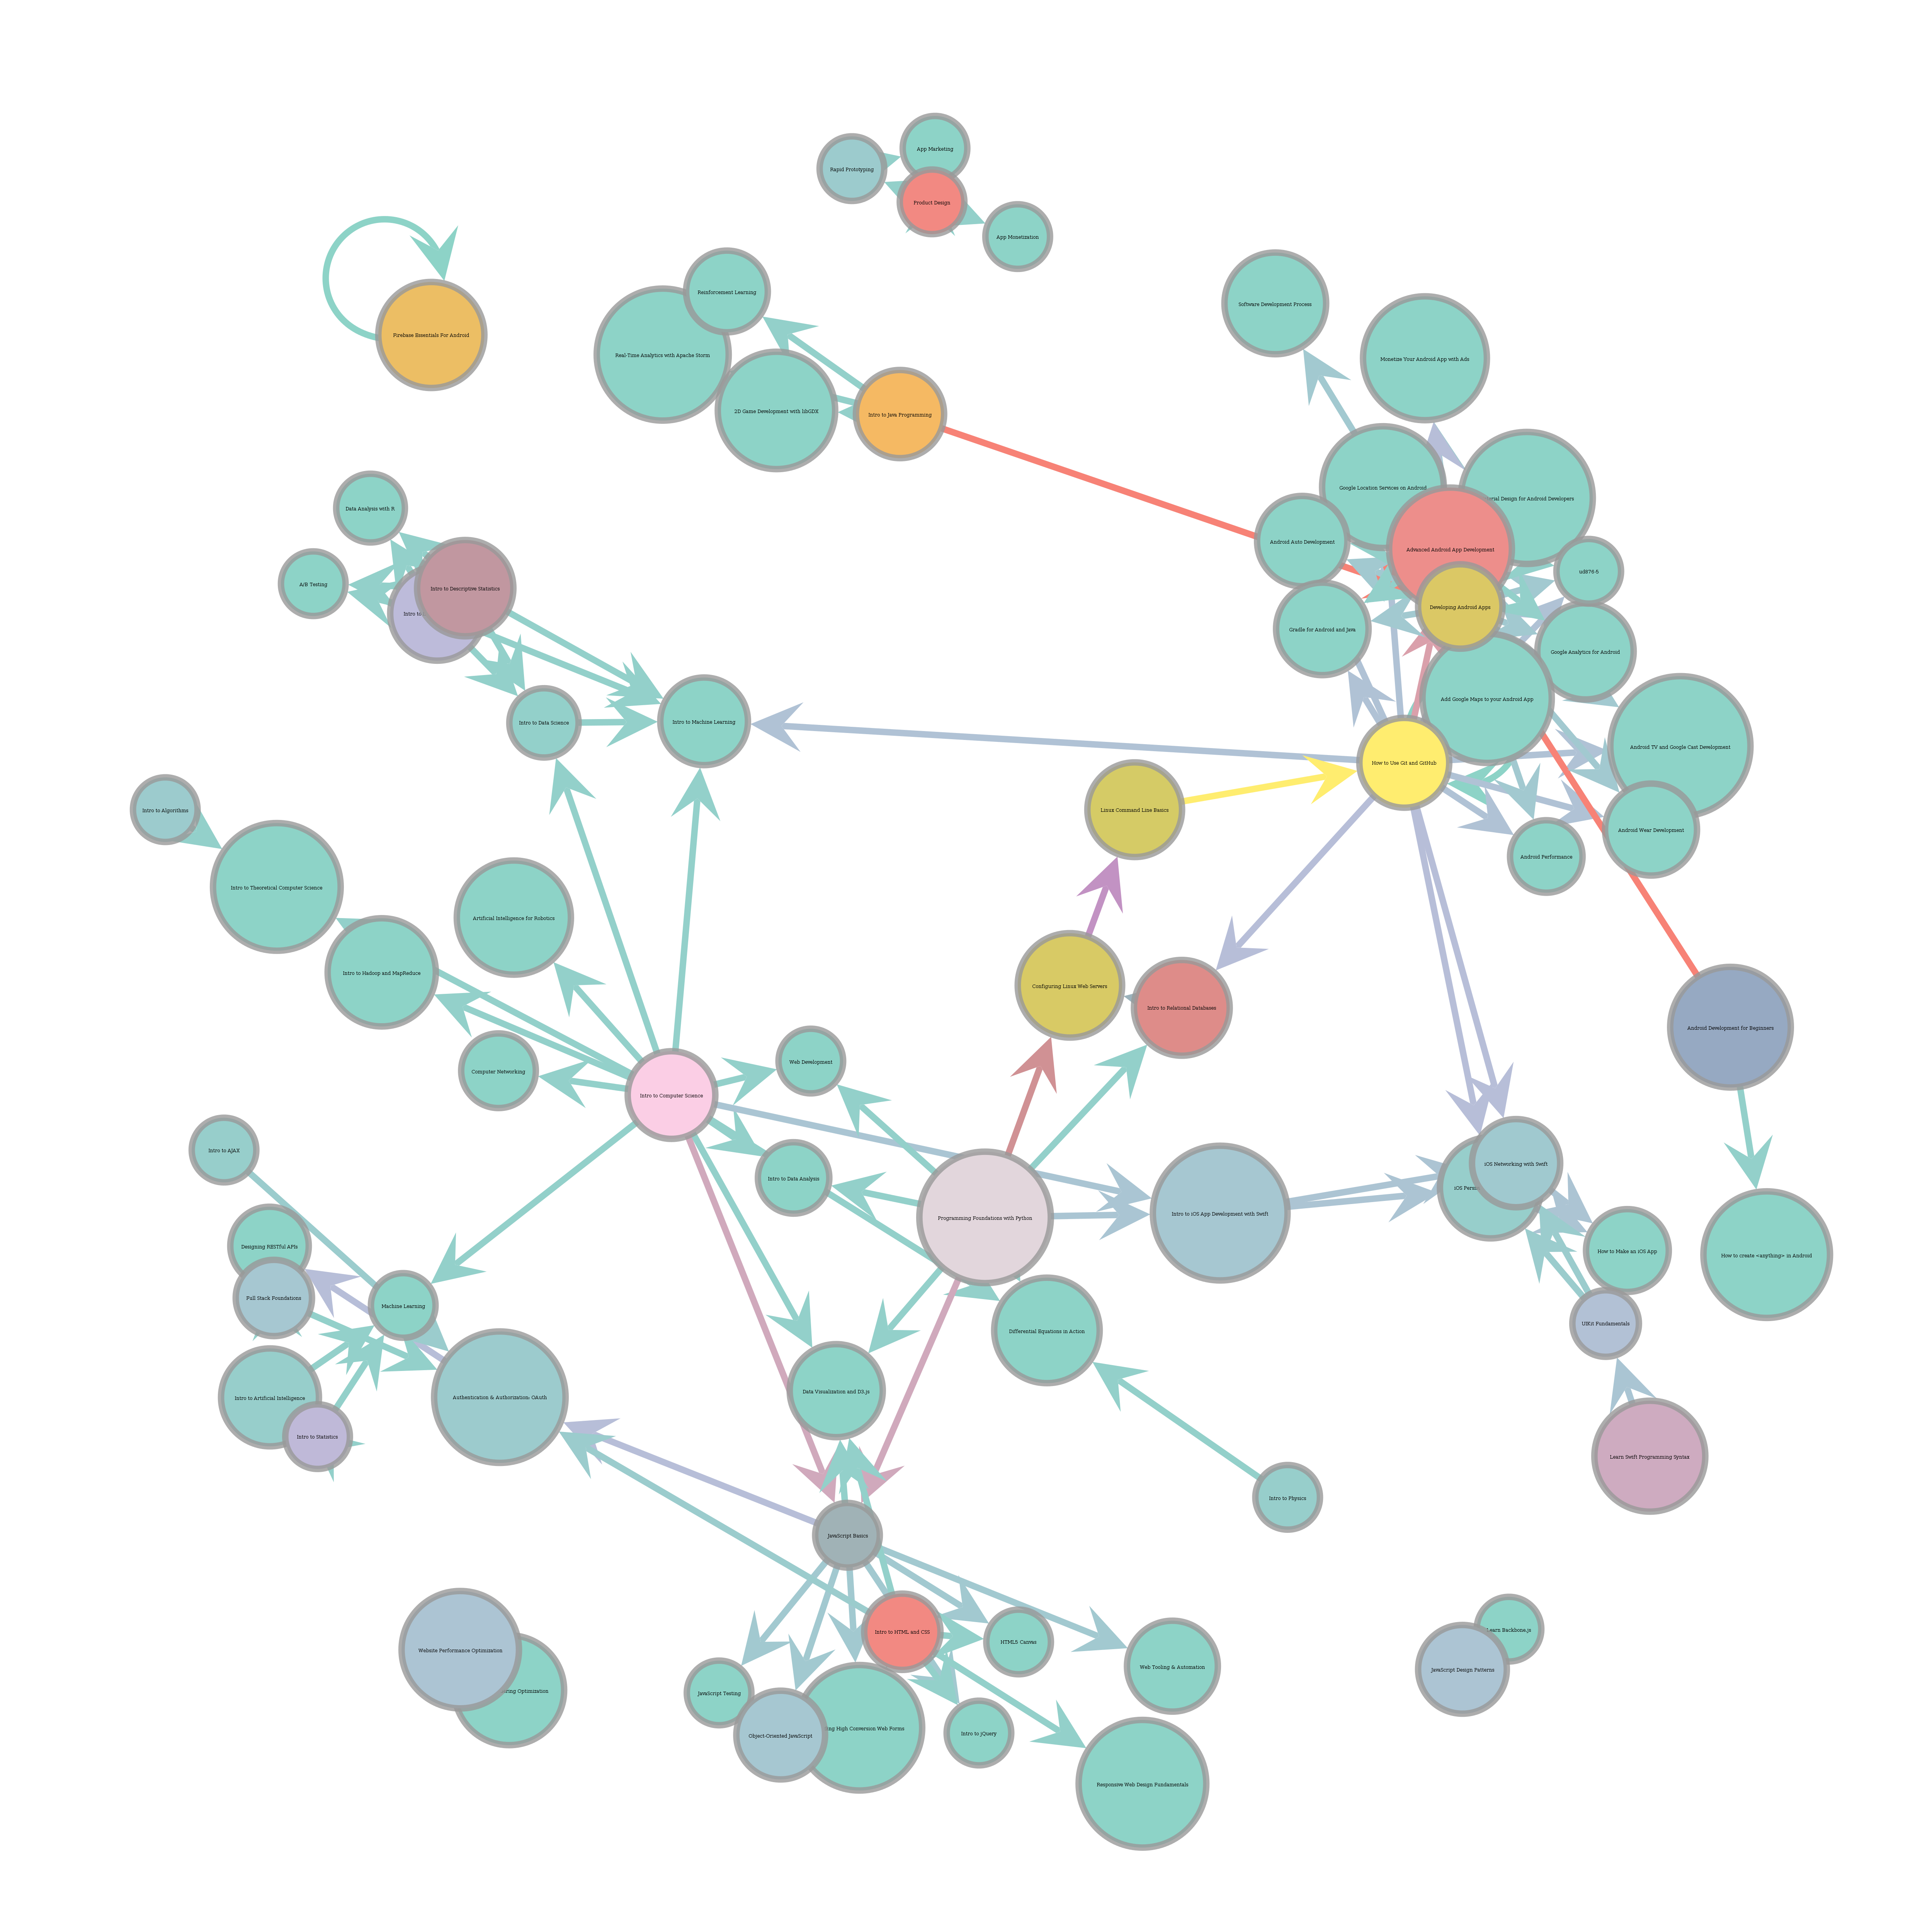

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7ff969e31a50, at 0x7ff96b925e10>

In [39]:
deg = g.degree_property_map('out')
deg.a = 4 * (np.sqrt(deg.a) * 0.5 + 0.4)
g.set_reversed(True)
pr = pagerank(g)
g.set_reversed(False)

ebet = betweenness(g)[1]
ebet.a /= ebet.a.max() / 10.
graph_draw(g, pos, output_size=(5000, 5000), 
           vertex_text=v_labels, inline=True, 
           edge_color=ebet,
           output='prereq_graph.png', vorder=deg,
           vertex_fill_color=pr)